# When inputting a stencil image and trying to get most similar etsy images, it might be useful to turn all of the etsy images into stencils on the backend

https://www.freecodecamp.org/news/sketchify-turn-any-image-into-a-pencil-sketch-with-10-lines-of-code-cf67fa4f68ce/
^code from here

# Load image

In [5]:
import imageio

In [7]:
img = "http://static.cricinfo.com/db/PICTURES/CMS/263600/263697.20.jpg"
start_img = imageio.imread(img)

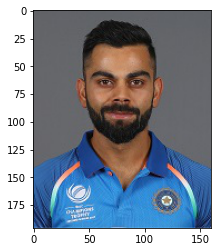

In [36]:
#just prints out initial image
plt.imshow(start_img, cmap="gray")

In [10]:
start_img.shape
#this is a 3 channel image of size 196x160 -- the output is of shape is (196,160,3)

(196, 160, 3)

# Greyscale

In [18]:
import numpy as np
def grayscale(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

In [19]:
#applying greyscale
gray_img = grayscale(start_img)


In [20]:
gray_img

Array([[ 98.157,  99.157,  99.157, ...,  98.673,  98.673,  98.673],
       [ 98.157,  99.157,  99.157, ...,  97.673,  98.673,  98.673],
       [ 99.157,  99.157,  99.157, ...,  97.673,  98.673,  99.673],
       ...,
       [104.994,  88.275,  84.916, ...,  60.691,  70.197,  40.122],
       [ 88.994, 100.275, 101.916, ...,  63.691,  57.186,  64.122],
       [102.994, 110.275, 116.916, ...,  92.691,  58.186, 124.122]])

# invert image

In [21]:
inverted_img = 255-gray_img

# Blur Image

In [22]:
import scipy.ndimage
blur_img = scipy.ndimage.filters.gaussian_filter(inverted_img,sigma=5)


In [23]:
blur_img

array([[155.91100823, 155.90893825, 155.90503447, ..., 156.54877196,
        156.55267734, 156.55455226],
       [155.88839312, 155.88631052, 155.8823902 , ..., 156.53565151,
        156.53939951, 156.54118944],
       [155.84415351, 155.84204394, 155.83808633, ..., 156.50966062,
        156.51307876, 156.51469088],
       ...,
       [179.75819904, 180.13320669, 180.86029191, ..., 194.1770833 ,
        193.79888795, 193.59675701],
       [178.89142731, 179.28922486, 180.06082294, ..., 194.06639256,
        193.66317647, 193.44837199],
       [178.43846944, 178.8479339 , 179.64232481, ..., 193.99754661,
        193.58150658, 193.36020927]])

# Dodge and Merge

In [27]:
def dodge(front,back):
    result=front*255/(255-back)
    result[result>255]=255
    result[back==255]=255
    return result.astype('uint8')


In [28]:
final_img= dodge(blur_img,gray_img)

In [29]:
final_img

Array([[253, 255, 255, ..., 255, 255, 255],
       [253, 255, 255, ..., 253, 255, 255],
       [255, 254, 254, ..., 253, 255, 255],
       ...,
       [255, 255, 255, ..., 254, 255, 229],
       [255, 255, 255, ..., 255, 249, 255],
       [255, 255, 255, ..., 255, 250, 255]], dtype=uint8)

# Plot and Save

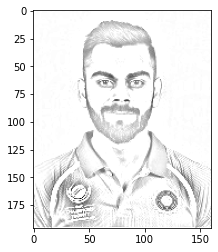

In [32]:
import matplotlib.pypl55ot as plt
plt.imshow(final_img, cmap="gray")


In [34]:
plt.imsave('img2.png', final_img, cmap='gray', vmin=0, vmax=255)